In [1]:
import numpy as np
import pandas as pd
import unicodedata    # remove the hidden special characters \xa0     ; can use repr(s) vs s to see

In [12]:
url = 'https://www.pgatour.com/stats/stat.{metric}.y{year}.eon.{tid}.html'

metric = ['02674', '02567', '101', '102']

dfs = pd.read_html('https://www.pgatour.com/stats/stat.02674.y2021.eon.t033.html')
df = dfs[1].head(100)
print(dfs[1])

    RANK THIS WEEK RANK LAST WEEK        PLAYER NAME  ROUNDS  AVERAGE  SG:OTT  \
0                1            NaN     Phil Mickelson       4    3.226   0.532   
1                2            NaN      Brooks Koepka       4    2.840   0.624   
2                3            NaN  Daniel van Tonder       4    2.834   0.590   
3                4            NaN         Paul Casey       4    2.832   0.595   
4                5            NaN    Collin Morikawa       4    2.819   1.039   
..             ...            ...                ...     ...      ...     ...   
76              77             24      Wyndham Clark       4   -1.218   0.592   
77              78            NaN     Dean Burmester       4   -1.322  -0.092   
78              79            NaN     Brendan Steele       4   -1.784  -1.183   
79              80            NaN         Brad Marek       4   -2.452  -0.375   
80              81            NaN          Brian Gay       4   -3.680  -0.835   

    SG:APR  SG:ARG  MEASURE

In [13]:
df = pd.read_csv('C:\\Users\\richd\\data\\pga_events.csv',
                dtype = {'year': str,
                        'tid': str,
                        'tournament': str,
                        't_num': str})

year = df['year']
tid = df['tid']
tournament = df['tournament']
t_num_of_year = df['t_num']

In [14]:
new_list = []

for i, j, k, l in zip(year, tid, tournament, t_num_of_year):
    dfs = pd.read_html(url.format(metric=109, year=i, tid=j))    # top tourney from file removed for merge
    df = dfs[1]
    df['year'] = i
    df['tournament'] = k
    df['t_num_of_year'] = l
    new_list.append(df)
    
money_list = pd.concat(new_list)
money_list = money_list.drop(['RANK LAST WEEK', 'EVENTS', 'YTD VICTORIES'], axis=1)

for col in money_list.columns:
    money_list.rename(columns = {col: unicodedata.normalize("NFKD", col)}, inplace=True)

print(money_list)

   RANK THIS WEEK        PLAYER NAME       MONEY  year  \
0               1      Retief Goosen  $1,080,000  2004   
1               2        Tiger Woods    $648,000  2004   
2               3        Jerry Kelly    $414,000  2004   
3              T4       Stephen Ames    $248,000  2004   
4              T4        Mark Hensby    $248,000  2004   
..            ...                ...         ...   ...   
62            T63     Michael Gligic     $14,770  2022   
63            T63      Lanto Griffin     $14,770  2022   
64            T63  Austin Smotherman     $14,770  2022   
65            T66       David Skinns     $14,420  2022   
66            T66   Michael Thompson     $14,420  2022   

                                      tournament t_num_of_year  
0   THE TOUR Championship presented by Coca-Cola            48  
1   THE TOUR Championship presented by Coca-Cola            48  
2   THE TOUR Championship presented by Coca-Cola            48  
3   THE TOUR Championship presented by Coca

In [15]:
new_list = []

for i, j, k, l in zip(year, tid, tournament, t_num_of_year):
    dfs = pd.read_html(url.format(metric='02674', year=i, tid=j))    # top tourney from file removed for merge
    df = dfs[1]
    df['year'] = i
    df['tournament'] = k
    df['t_num_of_year'] = l
    new_list.append(df)
    
t_t_g = pd.concat(new_list)
for col in t_t_g.columns:
    t_t_g.rename(columns = {col: unicodedata.normalize("NFKD", col)}, inplace=True)

new_list = []

for i, j, k, l in zip(year, tid, tournament, t_num_of_year):
    dfs = pd.read_html(url.format(metric='02564', year=i, tid=j))    # top tourney from file removed for merge
    df = dfs[1]
    df['year'] = i
    df['tournament'] = k
    df['t_num_of_year'] = l
    new_list.append(df)
    
putt = pd.concat(new_list)
for col in putt.columns:
    putt.rename(columns = {col: unicodedata.normalize("NFKD", col)}, inplace=True)

new_list = []

for i, j, k, l in zip(year, tid, tournament, t_num_of_year):
    dfs = pd.read_html(url.format(metric=101, year=i, tid=j))    # top tourney from file removed for merge
    df = dfs[1]
    df['year'] = i
    df['tournament'] = k
    df['t_num_of_year'] = l
    new_list.append(df)
    
driv_dist = pd.concat(new_list)
for col in driv_dist.columns:
    driv_dist.rename(columns = {col: unicodedata.normalize("NFKD", col)}, inplace=True)

new_list = []

for i, j, k, l in zip(year, tid, tournament, t_num_of_year):
    dfs = pd.read_html(url.format(metric=102, year=i, tid=j))    # top tourney from file removed for merge
    df = dfs[1]
    df['year'] = i
    df['tournament'] = k
    df['t_num_of_year'] = l
    new_list.append(df)
    
driv_acc = pd.concat(new_list)
for col in driv_acc.columns:
    driv_acc.rename(columns = {col: unicodedata.normalize("NFKD", col)}, inplace=True)

In [16]:
money_list = money_list.merge(t_t_g, on=['PLAYER NAME', 'year', 'tournament'], how='left')

money_list = money_list.merge(putt, on=['PLAYER NAME', 'year', 'tournament'], how='left')
money_list = money_list.merge(driv_dist, on=['PLAYER NAME', 'year', 'tournament'], how='left')
money_list = money_list.merge(driv_acc, on=['PLAYER NAME', 'year', 'tournament'], how='left')

money_list = money_list.loc[:,~money_list.columns.duplicated()]   # remove duplicate columns

C:\Users\richd\AppData\Local\Temp\ipykernel_50896\2906103591.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'RANK THIS WEEK_x', 't_num_of_year_x'} in the result is deprecated and will raise a MergeError in a future version.
  money_list = money_list.merge(driv_dist, on=['PLAYER NAME', 'year', 'tournament'], how='left')
C:\Users\richd\AppData\Local\Temp\ipykernel_50896\2906103591.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'RANK LAST WEEK_x', 'ROUNDS_x'} in the result is deprecated and will raise a MergeError in a future version.
  money_list = money_list.merge(driv_acc, on=['PLAYER NAME', 'year', 'tournament'], how='left')


In [17]:
money_list['RANK THIS WEEK_x'] = money_list['RANK THIS WEEK_x'].replace('T', '', regex=True)

money_list['RANK THIS WEEK_y'] = money_list['RANK THIS WEEK_y'].replace('T', '', regex=True)
money_list['RANK LAST WEEK_x'] = money_list['RANK LAST WEEK_x'].replace('T', '', regex=True)
money_list['RANK LAST WEEK_y'] = money_list['RANK LAST WEEK_y'].replace('T', '', regex=True)
money_list['RANK THIS WEEK'] = money_list['RANK THIS WEEK'].replace('T', '', regex=True)

money_list['MONEY'] = money_list['MONEY'].replace('[\$,]', '', regex=True).astype(float)
money_list = money_list.drop(['ROUNDS_y', 'MEASURED ROUNDS_x', 'MEASURED ROUNDS_y'], axis=1)

money_list['ott_total'] = money_list['ROUNDS_x'] * money_list['SG:OTT']
money_list['apr_total'] = money_list['ROUNDS_x'] * money_list['SG:APR']
money_list['arg_total'] = money_list['ROUNDS_x'] * money_list['SG:ARG']

In [27]:
money_list[['RANK THIS WEEK_x', 'year', 't_num_of_year_x', 'RANK THIS WEEK_y', 'RANK LAST WEEK_x', 'ROUNDS_x',
           't_num_of_year_y', 'RANK LAST WEEK_y', 'TOTAL DRIVES', 'RANK THIS WEEK', 'FAIRWAYS HIT', 'POSSIBLE FAIRWAYS',
           't_num_of_year']]  =   money_list[['RANK THIS WEEK_x', 'year', 't_num_of_year_x', 'RANK THIS WEEK_y', 'RANK LAST WEEK_x', 'ROUNDS_x',
           't_num_of_year_y', 'RANK LAST WEEK_y', 'TOTAL DRIVES', 'RANK THIS WEEK', 'FAIRWAYS HIT', 'POSSIBLE FAIRWAYS',
           't_num_of_year']].apply(pd.to_numeric)

In [19]:
conditions = [
    (money_list['RANK THIS WEEK_x'] <= 10),
    (money_list['RANK THIS WEEK_x'] >= 10.5) & (money_list['RANK THIS WEEK_x'] <= 40),
    (money_list['RANK THIS WEEK_x'] >= 40.5) 
]

values = ['top 10', 'middle', 'bottom']

money_list['rank'] = np.select(conditions, values)
money_list.head(20)

,RANK THIS WEEK_x,PLAYER NAME,MONEY,year,tournament,t_num_of_year_x,RANK THIS WEEK_y,RANK LAST WEEK_x,ROUNDS_x,AVERAGE_x,...,TOTAL DRIVES,RANK THIS WEEK,%,FAIRWAYS HIT,POSSIBLE FAIRWAYS,t_num_of_year,ott_total,apr_total,arg_total,rank
0,1,Retief Goosen,1080000.0,2004,THE TOUR Championship presented by Coca-Cola,48,1.0,45.0,4.0,2.332,...,8.0,20.0,53.57,30.0,56.0,48.0,1.884,7.112,0.332,top 10
1,2,Tiger Woods,648000.0,2004,THE TOUR Championship presented by Coca-Cola,48,9.0,NaN,4.0,0.747,...,8.0,29.0,35.71,20.0,56.0,48.0,0.536,3.084,-0.628,top 10
2,3,Jerry Kelly,414000.0,2004,THE TOUR Championship presented by Coca-Cola,48,6.0,NaN,4.0,1.033,...,8.0,5.0,67.86,38.0,56.0,48.0,-1.504,4.356,1.280,top 10
3,4,Stephen Ames,248000.0,2004,THE TOUR Championship presented by Coca-Cola,48,17.0,31.0,4.0,-0.329,...,8.0,17.0,55.36,31.0,56.0,48.0,-2.560,5.188,-3.944,top 10
4,4,Mark Hensby,248000.0,2004,THE TOUR Championship presented by Coca-Cola,48,11.0,NaN,4.0,0.526,...,8.0,8.0,62.50,35.0,56.0,48.0,0.912,-0.104,1.296,top 10
5,4,Mike Weir,248000.0,2004,THE TOUR Championship presented by Coca-Cola,48,15.0,NaN,4.0,-0.112,...,8.0,9.0,60.71,34.0,56.0,48.0,-2.348,1.428,0.472,top 10
6,7,Jay Haas,198000.0,2004,THE TOUR Championship presented by Coca-Cola,48,2.0,7.0,4.0,1.369,...,8.0,6.0,66.07,37.0,56.0,48.0,-1.580,4.412,2.644,top 10
7,7,Scott Verplank,198000.0,2004,THE TOUR Championship presented by Coca-Cola,48,12.0,NaN,4.0,0.499,...,8.0,2.0,83.93,47.0,56.0,48.0,-1.080,5.072,-2.000,top 10
8,9,Vijay Singh,180000.0,2004,THE TOUR Championship presented by Coca-Cola,48,4.0,1.0,4.0,1.203,...,8.0,23.0,48.21,27.0,56.0,48.0,1.860,-0.696,3.644,top 10
9,10,Ernie Els,158200.0,2004,THE TOUR Championship presented by Coca-Cola,48,10.0,NaN,4.0,0.577,...,8.0,27.0,44.64,25.0,56.0,48.0,0.448,0.980,0.880,top 10


In [23]:
arnie = money_list.loc[money_list['tournament'] == 'Arnold Palmer Invitational presented by MasterCard']

arnie_sg = arnie[['ott_total', 'apr_total','arg_total', 'TOTAL SG:PUTTING', 'rank']]
print(arnie_sg.head())

       ott_total  apr_total  arg_total  TOTAL SG:PUTTING    rank
12100      5.172      5.736      1.516             4.906  top 10
12101      1.716      6.088      3.288             4.240  top 10
12102     -1.336     10.412      0.400             4.856  top 10
12103      0.432      4.116      2.484             6.298  top 10
12104      2.588      5.408      1.100             3.238  top 10


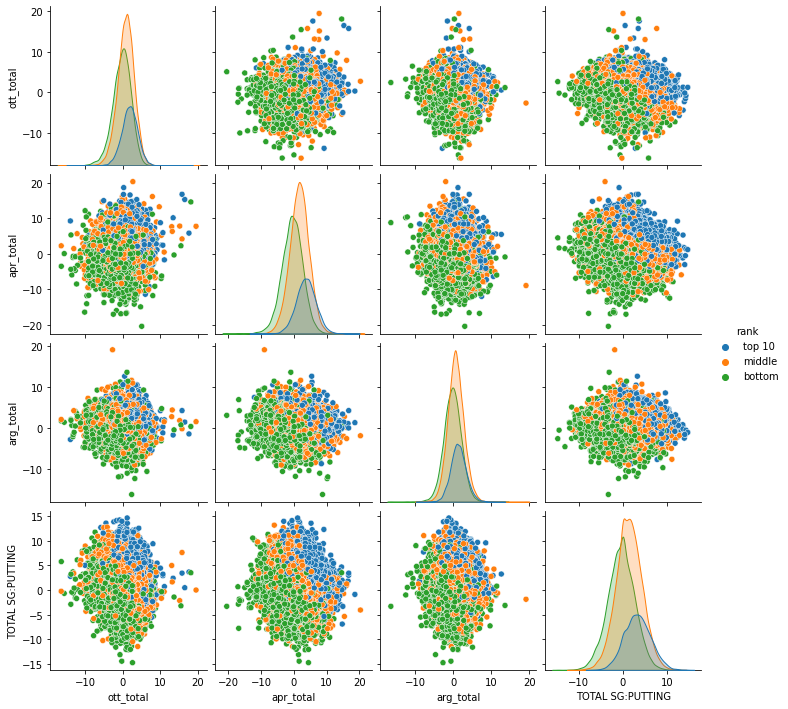

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

graph_sg = money_list[['ott_total', 'apr_total','arg_total', 'TOTAL SG:PUTTING', 'rank']]

sns.pairplot(graph_sg, vars=graph_sg.columns[:-1], hue="rank")
plt.show()

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi



HP_df = pd.DataFrame({
    'group': ['Top 10', '11-40', 'Remaining_Made_Cut'],
    'SG:Putting': [2.36, 1.76, 0.23],
    'SG:Off_The_Tee': [3.22, 1.19, -.15],
    'SG:Approach':[3.77, 1.50, -.56],
    'SG:Around_The_Green':[1.26, 0.70,.47]
})


McGladrey_df = pd.DataFrame({
    'group': ['Top 10', '11-40', 'Remaining_Made_Cut'],
    'SG:Putting': [4.0, 1.67, -.12],
    'SG:Off_The_Tee': [1.8, 1.27, .21],
    'SG:Approach':[3.1, 1.44, -.5],
    'SG:Around_The_Green':[.86, .71, .03]
})


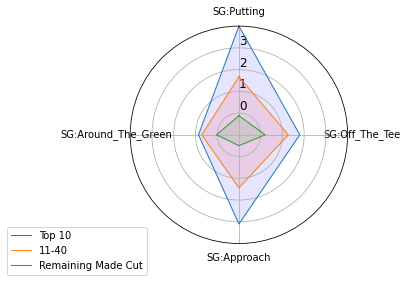

In [21]:
# number of variable
categories=list(McGladrey_df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,1,2,3], ["0","1","2","3"], color="black", size=12)
plt.ylim(-1,4)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=McGladrey_df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Top 10")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=McGladrey_df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="11-40")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=McGladrey_df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Remaining Made Cut")
ax.fill(angles, values, 'g', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


# Show the graph
plt.show()


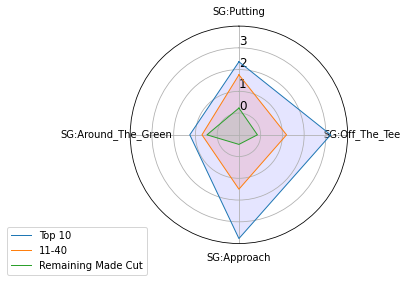

In [22]:
# number of variable
categories=list(HP_df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,1,2,3], ["0","1","2","3"], color="black", size=12)
plt.ylim(-1,4)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=HP_df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Top 10")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=HP_df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="11-40")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=HP_df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Remaining Made Cut")
ax.fill(angles, values, 'g', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()
